# Supervised Machine Learning Project
### Predicting Online Consumer Behavior

In [1]:
import pandas as pd

## The Dataset

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Column Descriptions:
- Administrative: This is the number of pages of this type (administrative) that the user visited.

- Administrative_Duration: This is the amount of time spent in this category of pages.

- Informational: This is the number of pages of this type (informational) that the user visited.

- Informational_Duration: This is the amount of time spent in this category of pages.

- ProductRelated: This is the number of pages of this type (product related) that the user visited.

- ProductRelated_Duration: This is the amount of time spent in this category of pages.

- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

- ExitRates: The percentage of pageviews on the website that end at that specific page.

- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
[More information about calculation](https://support.google.com/analytics/answer/2695658?hl=en)

- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.

- Month: Contains the month the pageview occurred, in string form.

- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

- Browser: An integer value representing the browser that the user was using to view the page.

- Region: An integer value representing which region the user is located in.

- TrafficType: An integer value representing what type of traffic the user is categorized into. [Read more about traffic types](https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)

- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

- Weekend: A boolean representing whether the session is on a weekend.

- Revenue: A boolean representing whether or not the user completed the purchase. The target variable!

## Inspect Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Checking the balance of the target variable 'Revenue'
target_balance = df['Revenue'].value_counts(normalize=True)

# Summary statistics of numerical features
numerical_summary = df.describe()

print(f"Missing Values:\n{missing_values}\n\nTarget Balance:\n{target_balance}\n\nNumerical Summary:\n{numerical_summary}")

Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Target Balance:
False    0.845255
True     0.154745
Name: Revenue, dtype: float64

Numerical Summary:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000

#### Notes:
- The dataset is imbalanced with about 84.5% of instances belonging to the False class and 15.5% belonging to the True class. This imbalance will need to be addressed during model training, either by resampling the dataset or by using appropriate evaluation metrics.
- Features like Administrative, Informational, and ProductRelated have a wide range of values, indicating varying user behavior in terms of the number of pages visited.
- BounceRates and ExitRates are mostly low, suggesting that users generally visit multiple pages on the website.
- PageValues have a high maximum value compared to other features, which might indicate outliers or high variability in this feature.

## Data Preprocessing

#### Preprocessor pipeline
- Encoding
- Scaling

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Encoding Categorical Features
categorical_features = ['Month', 'VisitorType', 'Weekend']


# Encoding Numerical Features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
                      'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


# Constructing the column transformer that will allow us to preprocess the dataframe
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', drop="if_binary"))
numerical_transformer = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((numerical_transformer, numerical_features), 
                                       (categorical_transformer, categorical_features)) 

#### X & y, Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Revenue", axis=1)
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Handling Class Imbalance

In [7]:
df.Revenue.value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [8]:
# Downsampling the majority class in the training data

# Combining X_train and y_train for downsampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separating majority and minority classes
majority = train_data[train_data.Revenue == False]
minority = train_data[train_data.Revenue == True]

# Downsampling majority class
majority_downsampled = majority.sample(n=len(minority), random_state=0)

# Combining minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])

# Shuffling the data
downsampled = downsampled.sample(frac=1, random_state=0)

# Separating features and target variable from downsampled data
X_train_downsampled = downsampled.drop(columns=['Revenue'])
y_train_downsampled = downsampled['Revenue']

# Checking the distribution of the target variable in the downsampled training data
y_train_downsampled.value_counts()

True     1486
False    1486
Name: Revenue, dtype: int64

## Testing Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#### Testing with class_weight='balanced'

In [10]:
# Make a list of different classifier models
models = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced', random_state=0)),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=0)),
    ('Random Forest', RandomForestClassifier(class_weight='balanced', random_state=0)),
    ('SVC', SVC(class_weight='balanced', random_state=0)),
    ('Naive Bayes', GaussianNB())
]

In [11]:
from sklearn.metrics import classification_report
# Dictionary to store the classification reports for each model
classification_reports = {}

# Training the models on the original training data with class_weight='balanced'
for model_name, model in models:
    # Creating a pipeline with preprocessing and model
    pipeline = make_pipeline(preprocessor, model)
    
    # Fitting the model
    pipeline.fit(X_train, y_train)
    
    # Predicting the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculating the classification report
    report = classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue'], output_dict=True)
    classification_reports[model_name] = report

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####  Displaying the classification reports for models with class_weight='balanced'

In [12]:
classification_reports['Logistic Regression']

{'No Revenue': {'precision': 0.9425711275026344,
  'recall': 0.8752446183953033,
  'f1-score': 0.9076610857432776,
  'support': 2044.0},
 'Revenue': {'precision': 0.551056338028169,
  'recall': 0.7417061611374408,
  'f1-score': 0.6323232323232323,
  'support': 422.0},
 'accuracy': 0.8523925385239254,
 'macro avg': {'precision': 0.7468137327654016,
  'recall': 0.8084753897663721,
  'f1-score': 0.769992159033255,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8755722462543682,
  'recall': 0.8523925385239254,
  'f1-score': 0.8605432535683956,
  'support': 2466.0}}

In [13]:
classification_reports['Decision Tree']

{'No Revenue': {'precision': 0.9041944709246902,
  'recall': 0.928082191780822,
  'f1-score': 0.9159826170931917,
  'support': 2044.0},
 'Revenue': {'precision': 0.6005434782608695,
  'recall': 0.523696682464455,
  'f1-score': 0.5594936708860759,
  'support': 422.0},
 'accuracy': 0.8588807785888077,
 'macro avg': {'precision': 0.7523689745927798,
  'recall': 0.7258894371226385,
  'f1-score': 0.7377381439896338,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8522314867786512,
  'recall': 0.8588807785888077,
  'f1-score': 0.8549776149442043,
  'support': 2466.0}}

In [14]:
classification_reports['Random Forest']

{'No Revenue': {'precision': 0.9083793738489871,
  'recall': 0.9652641878669276,
  'f1-score': 0.9359582542694498,
  'support': 2044.0},
 'Revenue': {'precision': 0.7585034013605442,
  'recall': 0.5284360189573459,
  'f1-score': 0.6229050279329609,
  'support': 422.0},
 'accuracy': 0.8905109489051095,
 'macro avg': {'precision': 0.8334413876047657,
  'recall': 0.7468501034121368,
  'f1-score': 0.7794316411012053,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8827314985894077,
  'recall': 0.8905109489051095,
  'f1-score': 0.8823862909628811,
  'support': 2466.0}}

In [15]:
classification_reports['SVC']

{'No Revenue': {'precision': 0.9403217436429684,
  'recall': 0.8864970645792564,
  'f1-score': 0.912616469403173,
  'support': 2044.0},
 'Revenue': {'precision': 0.5695732838589982,
  'recall': 0.7274881516587678,
  'f1-score': 0.6389177939646202,
  'support': 422.0},
 'accuracy': 0.8592862935928629,
 'macro avg': {'precision': 0.7549475137509833,
  'recall': 0.8069926081190121,
  'f1-score': 0.7757671316838965,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8768765489840732,
  'recall': 0.8592862935928629,
  'f1-score': 0.8657791453824635,
  'support': 2466.0}}

In [16]:
classification_reports['Naive Bayes']

{'No Revenue': {'precision': 0.9399585921325052,
  'recall': 0.6663405088062623,
  'f1-score': 0.7798454050959062,
  'support': 2044.0},
 'Revenue': {'precision': 0.32940019665683384,
  'recall': 0.7938388625592417,
  'f1-score': 0.4656011118832523,
  'support': 422.0},
 'accuracy': 0.6881589618815896,
 'macro avg': {'precision': 0.6346793943946696,
  'recall': 0.730089685682752,
  'f1-score': 0.6227232584895792,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8354753630608374,
  'recall': 0.6881589618815896,
  'f1-score': 0.7260696176929298,
  'support': 2466.0}}

#### Testing with downsampled training data

In [17]:
# Make a list of different classifier models
models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('SVC', SVC(random_state=0)),
    ('Naive Bayes', GaussianNB())
]

In [18]:
# Dictionary to store the classification reports for each model on downsampled data
classification_reports_downsampled = {}

# Training the models on the downsampled training data
for model_name, model in models:
    # Creating a pipeline with preprocessing and model
    pipeline = make_pipeline(preprocessor, model)
    
    # Fitting the model on downsampled data
    pipeline.fit(X_train_downsampled, y_train_downsampled)
    
    # Predicting the test data
    y_pred_downsampled = pipeline.predict(X_test)
    
    # Calculating the classification report
    report_downsampled = classification_report(y_test, y_pred_downsampled, target_names=['No Revenue', 'Revenue'], output_dict=True)
    classification_reports_downsampled[model_name] = report_downsampled

#### Displaying the classification reports for models on downsampled data

In [19]:
classification_reports_downsampled['Logistic Regression']

{'No Revenue': {'precision': 0.940625,
  'recall': 0.8835616438356164,
  'f1-score': 0.9112008072653884,
  'support': 2044.0},
 'Revenue': {'precision': 0.5641025641025641,
  'recall': 0.7298578199052133,
  'f1-score': 0.6363636363636364,
  'support': 422.0},
 'accuracy': 0.8572587185725872,
 'macro avg': {'precision': 0.7523637820512821,
  'recall': 0.8067097318704148,
  'f1-score': 0.7737822218145124,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8761917202154428,
  'recall': 0.8572587185725872,
  'f1-score': 0.8641686555538963,
  'support': 2466.0}}

In [20]:
classification_reports_downsampled['Decision Tree']

{'No Revenue': {'precision': 0.9467592592592593,
  'recall': 0.8003913894324853,
  'f1-score': 0.8674443266171792,
  'support': 2044.0},
 'Revenue': {'precision': 0.44715447154471544,
  'recall': 0.7819905213270142,
  'f1-score': 0.5689655172413793,
  'support': 422.0},
 'accuracy': 0.797242497972425,
 'macro avg': {'precision': 0.6969568654019873,
  'recall': 0.7911909553797498,
  'f1-score': 0.7182049219292792,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8612632250274922,
  'recall': 0.797242497972425,
  'f1-score': 0.8163664443963408,
  'support': 2466.0}}

In [21]:
classification_reports_downsampled['Random Forest']

{'No Revenue': {'precision': 0.96126568466994,
  'recall': 0.8620352250489237,
  'f1-score': 0.9089502192416817,
  'support': 2044.0},
 'Revenue': {'precision': 0.5545023696682464,
  'recall': 0.8317535545023697,
  'f1-score': 0.6654028436018957,
  'support': 422.0},
 'accuracy': 0.856853203568532,
 'macro avg': {'precision': 0.7578840271690932,
  'recall': 0.8468943897756467,
  'f1-score': 0.7871765314217887,
  'support': 2466.0},
 'weighted avg': {'precision': 0.891657363935668,
  'recall': 0.856853203568532,
  'f1-score': 0.867272606703162,
  'support': 2466.0}}

In [22]:
classification_reports_downsampled['SVC']

{'No Revenue': {'precision': 0.9397781299524565,
  'recall': 0.8703522504892368,
  'f1-score': 0.903733807467615,
  'support': 2044.0},
 'Revenue': {'precision': 0.537521815008726,
  'recall': 0.7298578199052133,
  'f1-score': 0.6190954773869346,
  'support': 422.0},
 'accuracy': 0.8463098134630981,
 'macro avg': {'precision': 0.7386499724805913,
  'recall': 0.800105035197225,
  'f1-score': 0.7614146424272747,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8709410801121262,
  'recall': 0.8463098134630981,
  'f1-score': 0.8550244095381554,
  'support': 2466.0}}

In [23]:
classification_reports_downsampled['Naive Bayes']

{'No Revenue': {'precision': 0.9479813664596274,
  'recall': 0.5973581213307241,
  'f1-score': 0.7328931572629052,
  'support': 2044.0},
 'Revenue': {'precision': 0.30135823429541597,
  'recall': 0.8412322274881516,
  'f1-score': 0.44375000000000003,
  'support': 422.0},
 'accuracy': 0.6390916463909164,
 'macro avg': {'precision': 0.6246698003775217,
  'recall': 0.7192951744094378,
  'f1-score': 0.5883215786314526,
  'support': 2466.0},
 'weighted avg': {'precision': 0.8373264752295799,
  'recall': 0.6390916463909164,
  'f1-score': 0.6834128602779311,
  'support': 2466.0}}

#### Grid Search Hyperparameter tuning with Cross-validation

In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2]
}

param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

In [25]:
# Create a GridSearchCV object for each model, 
# providing the model, parameter grid, and the number of folds for cross-validation.

grid_search_rf = GridSearchCV(
    make_pipeline(preprocessor, RandomForestClassifier()), 
    param_grid=param_grid_rf, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svc = GridSearchCV(
    make_pipeline(preprocessor, SVC()), 
    param_grid=param_grid_svc, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

#### Fit the GridSearchCV object on your training data.

In [26]:
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'SpecialDay',
                                                                          'OperatingSystems',
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Month',
                                                                          'VisitorType',
                                                                          'Weekend'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [27]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'SpecialDay',
                                                                          'Oper...
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Month',
                                                                          'VisitorType',
                                                                          'Weekend'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_leaf': [1, 2],
                         'randomforestclassifier__min_samples_split': [2, 5],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  150]},
             scoring='accuracy')

In [28]:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print(f"Random Forest score: {best_score_rf}")
print(f"Random Forest params: {best_params_rf}\n")

print(f"SVC score: {best_score_svc}")
print(f"SVC params: {best_params_svc}")

Random Forest score: 0.9084545008733521
Random Forest params: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}

SVC score: 0.8984179424255851
SVC params: {'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}


In [29]:
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)

#### Classification report on best estimators

In [30]:
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Revenue', 'Revenue'])

print("Classification Report for Random Forest:")
print(report_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

  No Revenue       0.91      0.97      0.94      2044
     Revenue       0.78      0.51      0.62       422

    accuracy                           0.89      2466
   macro avg       0.84      0.74      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [31]:
report_svc = classification_report(y_test, y_pred_svc, target_names=['No Revenue', 'Revenue'])

print("Classification Report for SVC:")
print(report_svc)

Classification Report for SVC:
              precision    recall  f1-score   support

  No Revenue       0.91      0.96      0.93      2044
     Revenue       0.73      0.53      0.61       422

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466



## Final Evaluation

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate models with best parameters
rf = RandomForestClassifier(
    max_depth=10, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=100,
    random_state=0,
    class_weight='balanced'
)
svc = SVC(C=10, gamma='auto', kernel='rbf', probability=True, random_state=0, class_weight='balanced')

# Create pipelines
pipeline_rf = make_pipeline(preprocessor, rf)
pipeline_svc = make_pipeline(preprocessor, svc)

#### Fit the models

In [33]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Month', 'VisitorType',
                                                   'Weekend'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, random_state=0))])

In [34]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Month', 'VisitorType',
                                                   'Weekend'])])),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma='auto',
                     probability=True, random_state=0))])

## Final predictions on test data

In [35]:
# Predictions
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svc = pipeline_svc.predict(X_test)

#### Moving to the analysis part

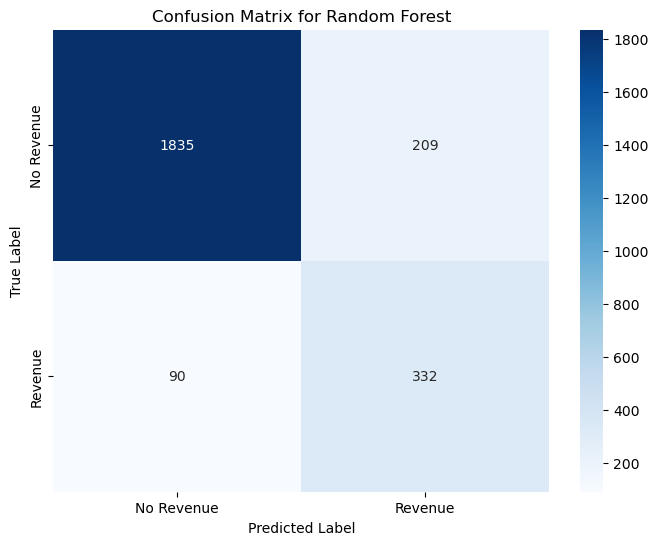

In [36]:
# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate Precision
precision = precision_score(y_test, y_pred_rf, pos_label=True)

# Calculate Recall
recall = recall_score(y_test, y_pred_rf, pos_label=True)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf, pos_label=True)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Displaying the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")

Accuracy: 0.8787510137875101
Precision: 0.6136783733826248
Recall: 0.7867298578199052
F1 Score: 0.6895119418483904
Confusion Matrix: 
[[1835  209]
 [  90  332]]


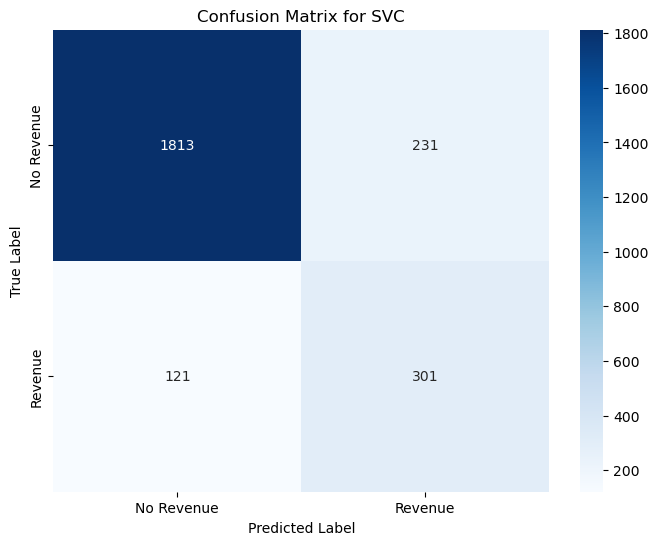

In [38]:
# Calculate the confusion matrix for SVC
cm_rf = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_pred_svc)

# Calculate Precision
precision = precision_score(y_test, y_pred_svc, pos_label=True)

# Calculate Recall
recall = recall_score(y_test, y_pred_svc, pos_label=True)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_svc, pos_label=True)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Displaying the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")

Accuracy: 0.8572587185725872
Precision: 0.5657894736842105
Recall: 0.7132701421800948
F1 Score: 0.631027253668763
Confusion Matrix: 
[[1813  231]
 [ 121  301]]


#### ROC Curve for best model

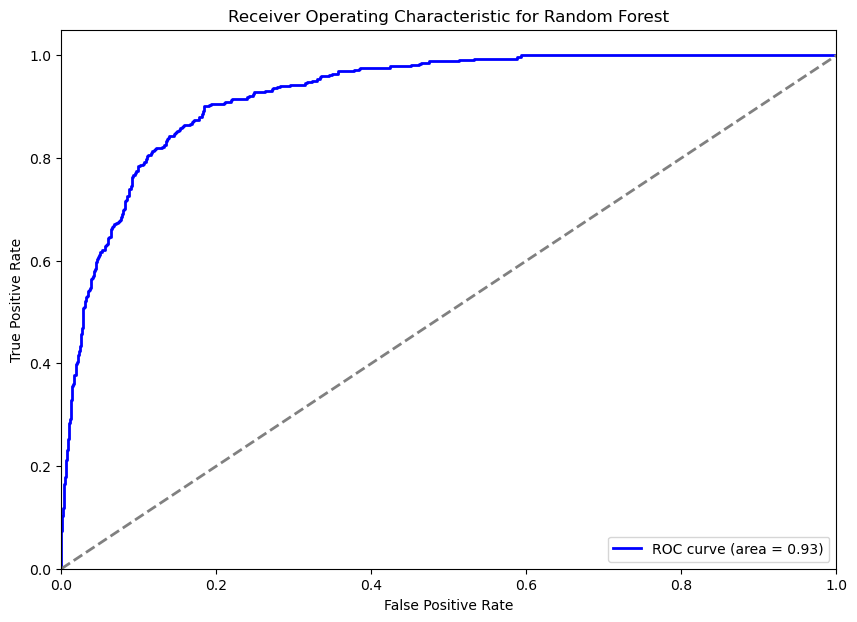

In [40]:
# Predicting the probabilities for Random Forest
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve for Random Forest
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

Above is the Receiver Operating Characteristic (ROC) curve for the Random Forest model. The ROC curve is a graphical representation of the trade off between the true positive rate (TPR) and false positive rate (FPR) at various thresholds.

The blue line represents the ROC curve of the Random Forest model.
The area under the ROC curve (AUC) is 0.92, which is excellent. An AUC score of 1 represents a perfect classifier, while an AUC score of 0.5 represents a worthless classifier.
The gray dashed line represents the ROC curve of a random classifier (AUC = 0.5).

#### Final evaluation